In [20]:
import yfinance as yf
import pandas as pd
import numpy as np

In [4]:
data.dtypes

Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Daily_return        float64
Daily_return_pct    float64
Daily_return_log    float64
SPY                 float64
dtype: object

In [8]:
def yearly_cumulative_return(year:int,tickers:[str]):
    '''
    Given a year (int) and a list of tickers, it returns the cumulative 
    returns of those stocks for that given year.     
    '''
    import matplotlib.pyplot as plt
    from matplotlib.dates import DateFormatter
    import matplotlib.dates as mdates
    from numpy import log, cumsum
    %matplotlib inline
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(DateFormatter("%m-%d-%Y"))
    year = str(year)
    for ticker in tickers:
        start_date,end_date = year + "-01-01", year + "-12-31"
        data = yf.download(ticker , start = start_date , end = end_date)
        data['Daily_return']=data['Close']/data['Close'].shift(1)-1
        data['Daily_return_pct'] = data['Close'].pct_change(1)
        data['Daily_return_log'] = log(data['Close']/data['Close'].shift(1))
        # Cumulative Returns
        data[ticker] = cumsum(data['Daily_return'])
        data[ticker][1:].plot() # skip first line
    plt.legend()
    plt.suptitle('Cumulative Return', fontsize=20)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


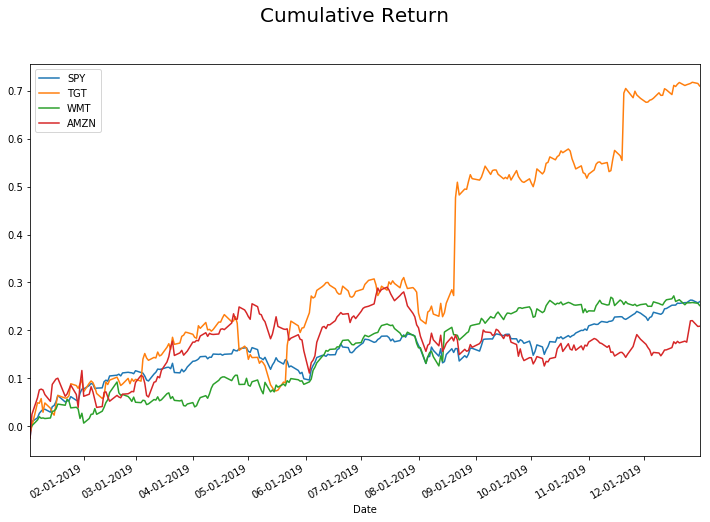

In [9]:
yearly_cumulative_return(2019, ['SPY', 'TGT', 'WMT', 'AMZN'])

In [11]:
def bollinger_band(mean_window: int, std_dev_window: int, tickers: [str], start_year: int, end_year: int):
    import matplotlib.pyplot as plt
    %matplotlib inline
    for ticker in tickers:
        start_date, end_date = str(start_year) + "-01-01",  str(end_year) + "-12-31"
        df = yf.download(ticker , start = start_date , end = end_date)
        MA_col_name = str(mean_window) + '_MA_Close'
        std_dev_col_name = str(std_dev_window) + '_std_close'
        df[MA_col_name] = df['Close'].rolling(window=mean_window).mean()
        #calculating 20 days rolling standard devtaion
        df[std_dev_col_name] = df['Close'].rolling(window=std_dev_window).std()
        df['Upper'] = df[MA_col_name] + 2*df[std_dev_col_name]
        df['Lower'] = df[MA_col_name] - 2*df[std_dev_col_name]
        df[['Close',MA_col_name,'Upper','Lower']].plot(figsize=(10,5))
        plt.suptitle(ticker, fontsize=20)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


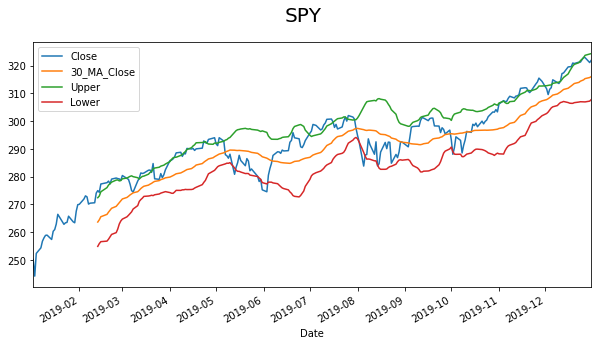

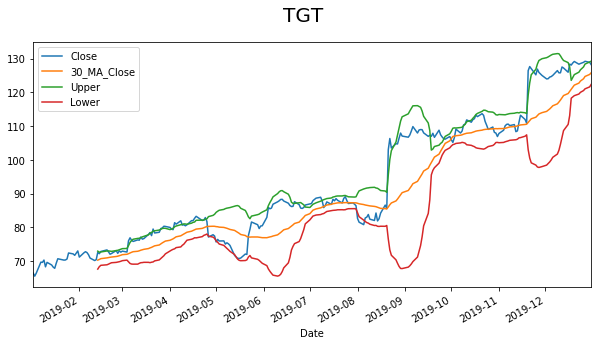

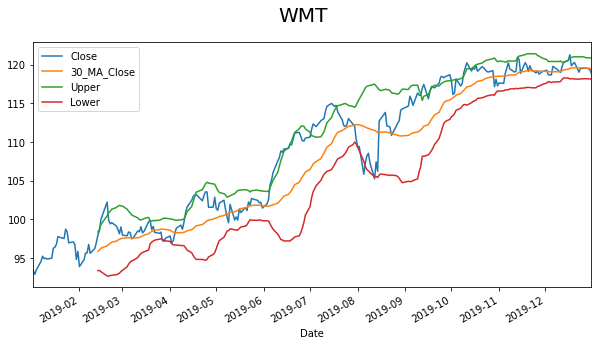

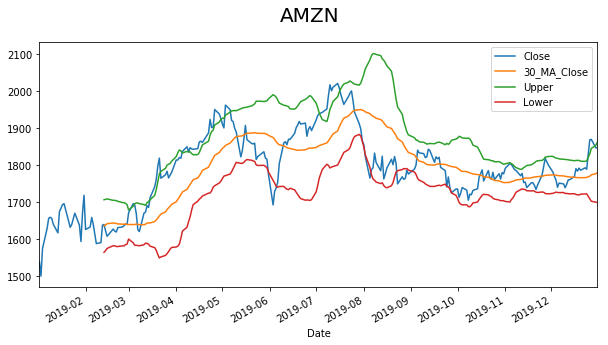

In [12]:
bollinger_band(30, 20, ['SPY', 'TGT', 'WMT', 'AMZN'] ,2019,2019)

Below, we will start looking into strategies. This first strategy is taken from Ran Aroussi's blog from the link below.

https://aroussi.com/post/worlds-best-strategy


The strategy:
1. Hold GLD (SPDR Gold Trust ETF) from December 20 of every year through February 20 of the following year, and during August.
2. The rest of the time hold SPLV (Invesco S&P 500 Low Volatility ETF)

I will present two ways of backtesting the cumulative returns of the strategy:
- v1: The first version creates a cumulative sum per period, then stores increments our ret variable, which is what is ultimately returned
- v2: The second version calculates the cumulative sum only once. This graph is more similar to what is shown on Ran Aroussi's blog post.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

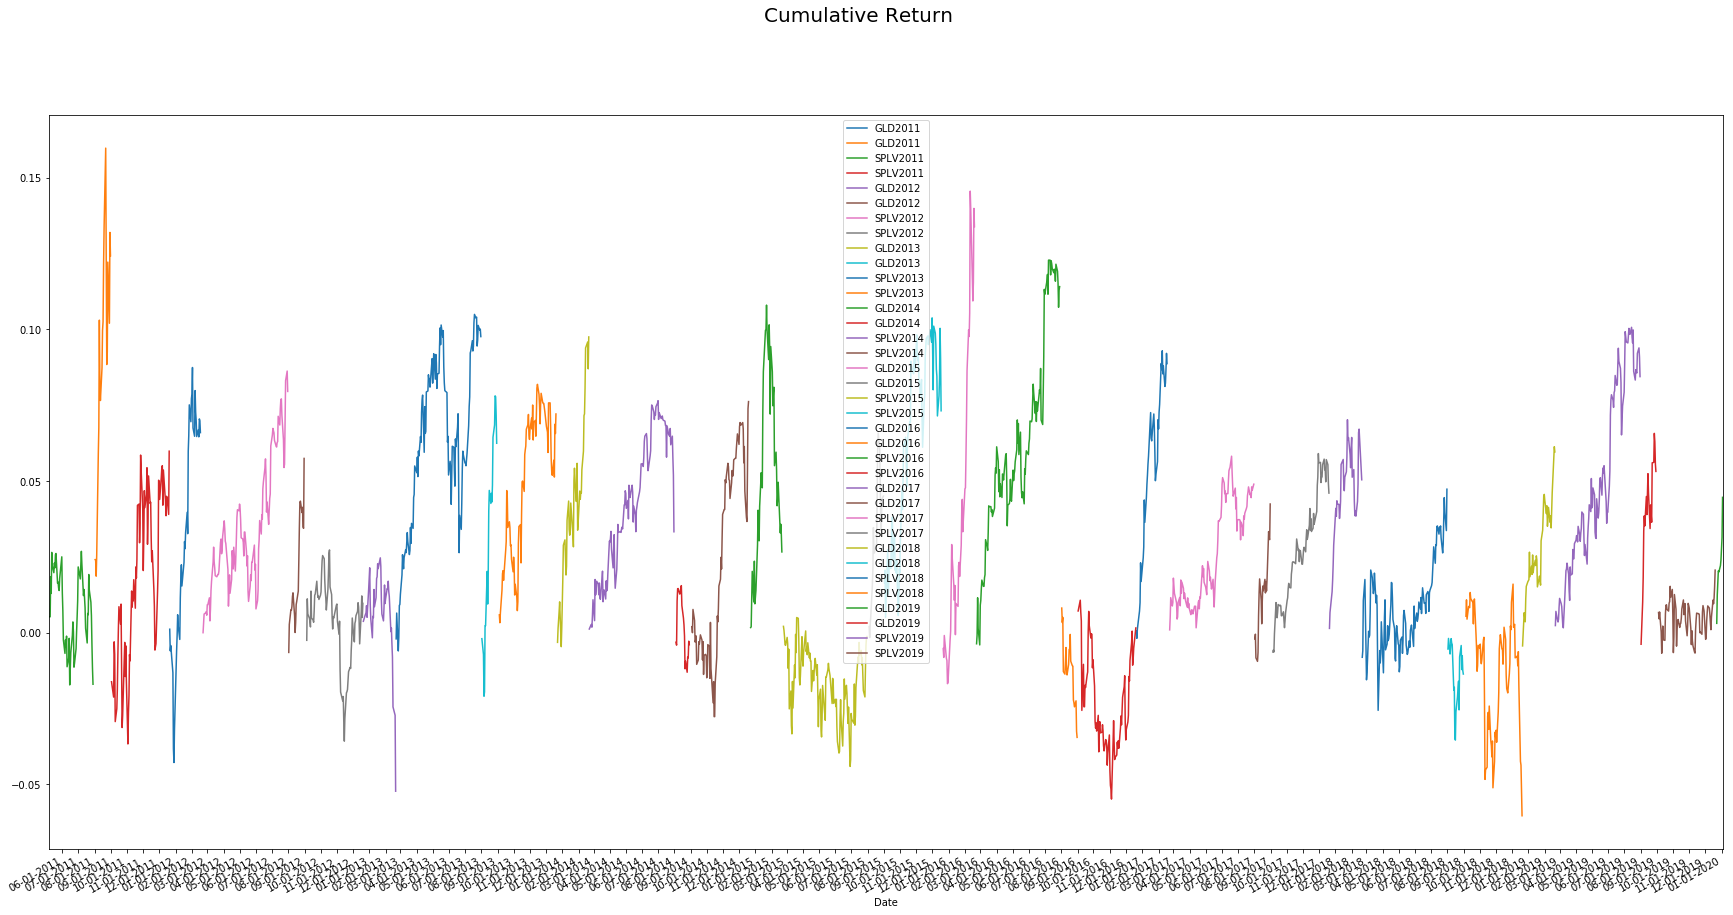

In [21]:
def worldsBestStrategyV1():
    '''
    first way of doing it; creates a cumulative sum per period, then increments the total with that sum
    '''
    import matplotlib.pyplot as plt
    from matplotlib.dates import DateFormatter
    import matplotlib.dates as mdates
    %matplotlib inline
    ret = 0
    fig, ax = plt.subplots(figsize=(30, 15))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(DateFormatter("%m-%d-%Y"))
    for year in range(2011, 2020):
        year = str(year)
        # Buy GLD 12/20 / Sell 2-20
        GLD_start_date,GLD_end_date = year + "-12-20", str(int(year)+1) + "-02-20"
        GLD_data = yf.download("GLD" , start = GLD_start_date , end = GLD_end_date)
        GLD_data['Daily_return']=GLD_data['Close']/GLD_data['Close'].shift(1)-1
        GLD_data["GLD" + year] = np.cumsum(GLD_data['Daily_return'])
        GLD_data["GLD" + year][1:].plot() # skip first line
        ret += GLD_data["GLD" + year][-1]
        # Buy GLD for August
        GLD_start_date,GLD_end_date = year + "-08-01", year + "-08-31"
        GLD_data = yf.download("GLD" , start = GLD_start_date , end = GLD_end_date)
        GLD_data['Daily_return']=GLD_data['Close']/GLD_data['Close'].shift(1)-1
        GLD_data["GLD" + year] = np.cumsum(GLD_data['Daily_return'])
        GLD_data["GLD" + year][1:].plot() # skip first line
        ret += GLD_data["GLD" + year][-1]
        SPLV_start_date,SPLV_end_date = year + "-02-20", year + "-07-31"
        # Buy SPLV the rest of the time
        SPLV_data = yf.download("SPLV" , start = SPLV_start_date , end = SPLV_end_date)
        SPLV_data['Daily_return']=SPLV_data['Close']/SPLV_data['Close'].shift(1)-1
        SPLV_data["SPLV" + year] = np.cumsum(SPLV_data['Daily_return'])
        SPLV_data["SPLV" + year][1:].plot() # skip first line
        ret += SPLV_data["SPLV" + year][-1]
        SPLV_start_date,SPLV_end_date = year + "-09-01", year + "-12-20"
        SPLV_data = yf.download("SPLV" , start = SPLV_start_date , end = SPLV_end_date)
        SPLV_data['Daily_return']=SPLV_data['Close']/SPLV_data['Close'].shift(1)-1
        SPLV_data["SPLV" + year] = np.cumsum(SPLV_data['Daily_return'])
        SPLV_data["SPLV" + year][1:].plot() # skip first line
        ret += SPLV_data["SPLV" + year][-1]
        
    print(" Cumulative Returns for GLD/SPLV strategy: {} ".format(ret))
    plt.legend()
    plt.suptitle('Cumulative Return', fontsize=20)

worldsBestStrategyV1()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

/home/ajc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


 Cumulative Returns for GLD/SPY strategy: 1.79 


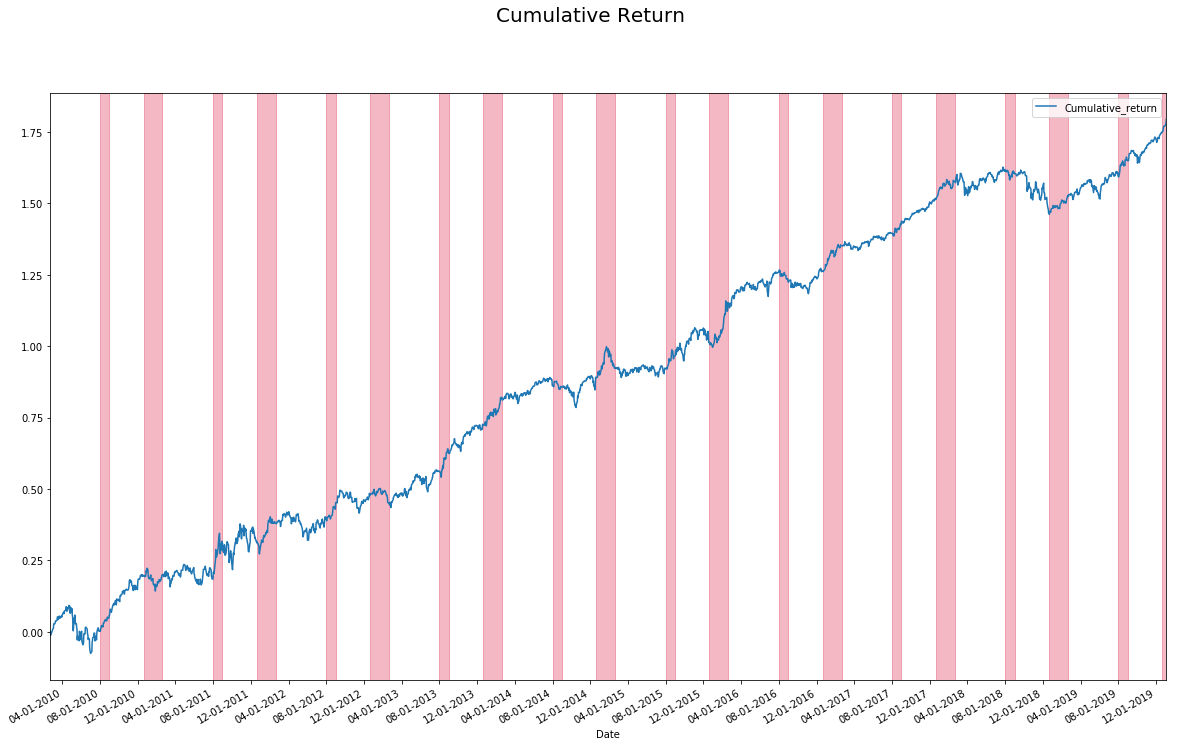

In [44]:
def worldsBestStrategyV2(ticker1: str, ticker2: str):
    '''
    second way of calculating the World's Best Strategy; creates a cumulative sum for the whole period.
    ticker 1: returns are shaded in red
    ticker 2: returns are shaded in white
    ''' 
    import matplotlib.pyplot as plt
    from matplotlib.dates import DateFormatter
    import matplotlib.dates as mdates
    %matplotlib inline
    fig, ax = plt.subplots(figsize=(20, 12))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    ax.xaxis.set_major_formatter(DateFormatter("%m-%d-%Y"))
    base_df = pd.DataFrame()
    hold_periods = []
    for year in range(2010, 2020):
        year = str(year)
        # Buy GLD 12/20 / Sell 2-20
        ticker1_start_date, ticker1_end_date = year + "-12-20", str(int(year)+1) + "-02-19"
        hold_periods.append((ticker1_start_date, ticker1_end_date))
        df1 = yf.download(ticker1 , start = ticker1_start_date , end = ticker1_end_date)
        df1['Daily_return']=df1['Close']/df1['Close'].shift(1)-1

        ticker2_start_date, ticker2_end_date = year + "-02-20", year + "-07-31"
        df3 = yf.download(ticker2 , start = ticker2_start_date , end = ticker2_end_date)
        df3['Daily_return']=df3['Close']/df3['Close'].shift(1)-1

        ticker1_start_date, ticker1_end_date  = year + "-08-01", year + "-08-31"
        hold_periods.append((ticker1_start_date, ticker1_end_date ))
        df2 = yf.download(ticker1 , start = ticker1_start_date , end = ticker1_end_date)
        df2['Daily_return']=df2['Close']/df2['Close'].shift(1)-1


        ticker2_start_date, ticker2_end_date = year + "-09-01", year + "-12-19"
        df4 = yf.download(ticker2 , start = ticker2_start_date , end = ticker2_end_date)
        df4['Daily_return'] = df4['Close'] / df4['Close'].shift(1)-1
        base_df = pd.concat([base_df,df1, df3, df2, df4])

    for i,j in enumerate(base_df['Daily_return']):
        if  pd.isna(base_df['Daily_return'][i]) :
            base_df['Daily_return'][i] = 0

    base_df.sort_index(inplace=True)
    base_df['Cumulative_return'] = np.cumsum(base_df['Daily_return'])
    base_df['Cumulative_return'].plot()
    for tup in hold_periods:
        ax.axvspan(tup[0], tup[1],  color="crimson", alpha=0.3)
    returns = base_df['Cumulative_return'][-1]
    print(" Cumulative Returns for {}/{} strategy: {:.2f} ".format(str(ticker1), str(ticker2), returns))
    plt.legend()
    plt.suptitle('Cumulative Return', fontsize=20)
worldsBestStrategyV2("GLD", "SPY")

The red area indicates the time period in which GLD is invested in. Compared to investing in SPY/SPLV (see below), we see that the GLD/SPLV strategy yields 60-70% more returns.

[*********************100%***********************]  1 of 1 completed
 Cumulative Returns for SPY strategy: 1.1527536519333177 
[*********************100%***********************]  1 of 1 completed
 Cumulative Returns for VTSAX strategy: 1.1646253408981755 


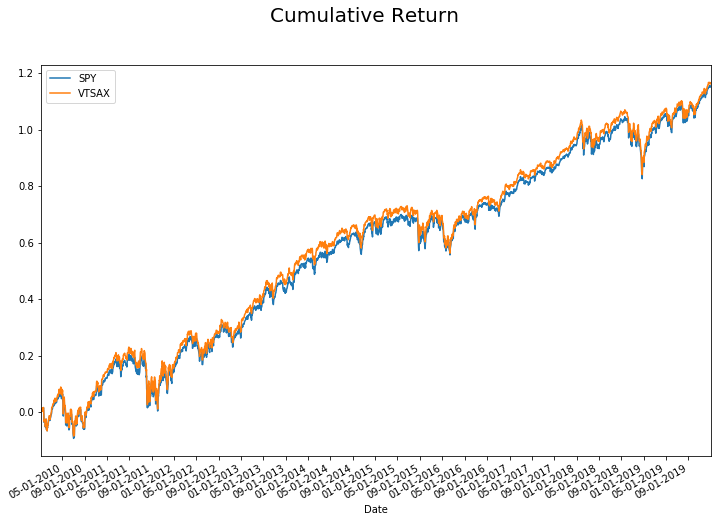

In [42]:
def cumulative_return_adjusted(start_year: int, end_year:int, tickers_str:[str]):
    import matplotlib.pyplot as plt
    from matplotlib.dates import DateFormatter
    import matplotlib.dates as mdates
    %matplotlib inline
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    ax.xaxis.set_major_formatter(DateFormatter("%m-%d-%Y"))
    start_year, end_year = str(start_year), str(end_year)
    for ticker in tickers_str:
        start_date,end_date = start_year + "-01-01", end_year + "-12-31"
        data = yf.download(ticker , start = start_date , end = end_date)
        data['Daily_return']=data['Close']/data['Close'].shift(1)-1
        # Cumulative Returns
        data[ticker] = np.cumsum(data['Daily_return'])
        data[ticker][1:].plot() # skip first line\
        print(" Cumulative Returns for {} strategy: {} ".format(ticker,data[ticker][-1]))
    plt.legend()
    plt.suptitle('Cumulative Return', fontsize=20)

cumulative_return_adjusted(2010,2019,["SPY", "VTSAX"])